# TODOS

- EDA komplett noch einmal machen
- Daten nochmal bereinigen
- Modelle vergleichen
    - Hyperparemterisierung
- Training
- Evaluieren


# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Problemdefinition und Ziele

## 🧩 **„Welche Arten von Unternehmensstandorten gibt es in Berlin und wie unterscheiden sie sich hinsichtlich Bevölkerungstruktur und Wirtschaftszweig?“**


### 🔍 **Was bedeutet das konkret?**

Durch **Clustering** gruppierst du ähnliche Unternehmensstandorte in Berlin anhand von:

- **Unternehmenstyp** (z.B. Größe, Branche, Unternehmensalter)
- **Sozialstruktur der Nachbarschaft** (Bodenrichtwert, Einwohnerzahl, Alter der Einwohner, Einwohnerdichte)
- **Räumliche Faktoren** (Bezirk, Typ der Fläche)


### 📌 **Warum könnte dies relevant sein?**

- Du identifizierst **typische Standortprofile**:  
  z.B. „Gewerbestandorte mit älterer Bevölkerung und niedrigem Bodenrichtwert“ vs. „Innovative Standorte mit jungen Menschen und hohen Immobilienwerten“.

- Die Ergebnisse können der IHK oder Stadtplanern helfen, zu verstehen, **welche Art von Unternehmen sich wo ansiedeln** und warum, sowie welche Faktoren eine Standortwahl beeinflussen.

- Daraus könnten gezielte **Standortförderungen** oder Stadtentwicklungsmaßnahmen abgeleitet werden.


### 🛠️ **Wie könnte man das methodisch umsetzen?**

- **Feature-Auswahl**:
  - `employees_numerical`, `Bodenrichtwert`, `business_age`
  - Demografische Merkmale: `alter_u6`, `alter_6_u10`, `alter_18_u65`, etc.
  - Wirtschaftszweige: `ihk_branch_desc` oder `ihk_branch_id` (nach vorheriger Aggregation)
  - Räumliche Merkmale: `Bezirk`, `Ortsteil`, `typklar`

- **Clustering-Verfahren**:
  - KMeans, DBSCAN oder hierarchisches Clustering
  - Nach Clusterbildung: Interpretation der Cluster (z.B. Visualisierung mit Geo-Karten)


### 🎯 **Typische Fragestellungen, die sich daraus ableiten:**

- Welche Standorttypen ziehen junge oder innovative Unternehmen an?
- Gibt es klar definierte Cluster mit ähnlicher Altersstruktur oder wirtschaftlichen Aktivitäten?
- Welche Standorttypen haben hohen Bodenrichtwert und welche Faktoren begünstigen diesen?


### 🚩 **Beispiel einer konkreten Problemfrage:**

> **„Welche Standorttypen von Unternehmen existieren in Berlin, und welche sozioökonomischen und demografischen Faktoren charakterisieren diese Standorttypen besonders?“**


### 📊 **Nutzen des Ergebnisses:**

Die Cluster-Ergebnisse ermöglichen eine zielgerichtete **Standortplanung**, **gezielte Förderpolitik** sowie ein verbessertes Verständnis der **lokalen Wirtschaftsstruktur** Berlins.


Diese Problemstellung eignet sich hervorragend, um die Daten mittels Clustering sinnvoll zu analysieren und strategisch wertvolle Erkenntnisse zu gewinnen!

# EDA (Understanding & Preperation)

- Branchenklassifikation vereinfachen: Falls nötig, Gruppierung von Branchen auf Top-Level (z. B. „Einzelhandel“, „Gastronomie“).
    - Hier die Branchen allgmeiner definieren
    - typklar auch allgmeiner definierne
- Daten aggregieren: Unternehmensdichte pro Bezirk / Ortsteil berechnen.
    - Ortsteil / Bezirk --> davon die durchschnitts MA Anzahl und Bodenrichtwert und Anzahl der Einwohner und Flächengröße

| Column        | Description |
| ------------- | ------------- |
| opendata_id           | Primary key |
| city                  | City of the business |
| postcode              | Postcode of the business |
| latitude              | Geolocation of the business, described by the latitude (Format: EPSG 4326) |
| longitude             | Geolocation of the business, described by the longitude (Format: EPSG 4326) |
| ihk_branch_id         | Branch ID of the business as defined by IHK classification of economic activities (finest granuality of distinction), see [IHK Wirtschaftszweige](https://www.ihk.de/blueprint/servlet/resource/blob/5186288/c8bb510197a45c71b59b7a27cdc31bcb/wzbra-wahlgruppen-fit-data.pdf) |
| employees_range       | The reported number of employees as range  |
| ihk_branch_desc       | Branch description of the business as defined by IHK classification of economic activities|
| business_age          | Current age of the business |
| business_type         | "Kleingewerbetreibender" = the business is a small trader, "im Handelsregister eingetragen" = the business is registered in the Commercial Register  |
| Bezirk                | Bezirk of the business |
| planungsraum_id       | LOR Planungsraum ID |
| Planungsraum          | LOR Planungsraum |
| Bezirksregion         | LOR Bezirksregion |
| Prognoseraum          | LOR Prognoseraum  |
| Ortsteil              | Ortsteil of the business |
|employees_numerical    | Der Durchschnitt aus den 2 Grenzen von employees_range |
|gründungsjahr          | Das Gründungsjahr berechnet von letztem Commit (Datum) an der CSV Datei von der IHK subtrahiert mit dem business_age |
|Bodenrichtwert         | Der Bodenrichtwert vom Stand 01.01.2024 |
|ew2023                 | Anzahl Einwohner > 2 vom Stand 01.01.2023|
|flalle                 | Flächengröße [m²] vom Stand 01.01.2023 |
|ha                     | Flächengröße der ISU5-Fläche vom Stand 01.01.2023 |
|ew_ha_2023             | Einwohner pro Hektar vom Stand 01.01.2023 |
|alter_u6               | Anzahl der Einwohner (> 2), die jünger als 6 Jahre sind vom Stand 01.01.2023 |
| alter_6_u10           | Anzahl der Einwohner (> 2), die 6 bis unter 10 Jahre alt sind vom Stand 01.01.2023 |
| alter_10_u18          | Anzahl der Einwohner (> 2), die 10 bis unter 18 Jahre alt sind vom Stand 01.01.2023  |
| alter_18_u65          | Anzahl der Einwohner (> 2), die 18 bis unter 65 Jahre alt sind vom Stand 01.01.2023 |
| alter_65_u70          | Anzahl der Einwohner (> 2), die 65 bis unter 70 Jahre alt sind vom Stand 01.01.2023 |
| alter_70_u75          | Anzahl der Einwohner (> 2), die 70 bis unter 75 Jahre alt sind vom Stand 01.01.2023 |
| alter75_u80           | Anzahl der Einwohner (> 2), die 75 bis unter 80 Jahre alt sind vom Stand 01.01.2023 |
| alter_80plus          | Anzahl der Einwohner (> 2), die 80 Jahre alt oder älter sind vom Stand 01.01.2023 |
| typklar               | Es werden 52 verschiedene Flächentypen unterschieden. Im Gegensatz zu den Nutzungen GRZ und WOZ wird hier besonders Wert auf eine differenzierte Darstellung der baulichen Nutzungen gelegt, die stadtstrukturell (Siedlungstyp, Alter etc.)  unterschieden werden. Die Flächentypen werden auch zur Zuordnung weitererer Indikatoren verwendet (Belagsklassen der Versiegelung, Kanalisation) |

In [2]:
df = pd.read_csv("../input/ihk_gewerbedaten_with_brw_einwohnerdichte.csv.gz",
                 compression="gzip",
                 header=0,
                 sep=",")
df.head()

,opendata_id,city,postcode,latitude,longitude,ihk_branch_id,employees_range,ihk_branch_desc,business_age,business_type,...,ew_ha_2023,alter_u6,alter_6_u10,alter_10_u18,alter_18_u65,alter_65_u70,alter_70_u75,alter75_u80,alter_80plus,typklar
0,572114,Berlin,10179,52.513315,13.411584,65122.0,0 Beschäftigte,Schaden- u. Unfallversicherungen,40.0,Kleingewerbetreibender,...,60.68,0.0,0.0,12.0,22.0,0.0,0.0,13.0,0.0,Kerngebiet
1,131831318,Berlin,10713,52.479296,13.319051,47430.0,0 Beschäftigte,EH m. Geräten der Unterhaltungselektronik,40.0,Kleingewerbetreibender,...,487.59,59.0,33.0,63.0,668.0,40.0,27.0,34.0,43.0,"Geschlossene Blockbebauung, Hinterhof (1870er ..."
2,943032071440,Berlin,12047,52.486200,13.429312,731108.0,0 Beschäftigte,"Promotion, Propagandisten",13.0,im Handelsregister eingetragen,...,666.12,18.0,3.0,22.0,202.0,3.0,0.0,3.0,3.0,"Geschlossene Blockbebauung, Hinterhof (1870er ..."
3,927441671472,Berlin,10117,52.513509,13.385791,6831.0,4 - 6 Beschäftigte,"Vermittlung v. Grundstücken, Gebäuden u. Wohnu...",10.0,Kleingewerbetreibender,...,101.53,3.0,0.0,3.0,37.0,3.0,3.0,0.0,0.0,Kerngebiet
4,942996071320,Berlin,10245,52.513798,13.454217,62020.0,0 Beschäftigte,Erbringung v. Beratungsleistungen auf dem Gebi...,10.0,im Handelsregister eingetragen,...,344.41,88.0,41.0,57.0,1157.0,16.0,10.0,6.0,13.0,"Geschlossene Blockbebauung, Hinterhof (1870er ..."


In [3]:
df[df["ihk_branch_id"] > 0.0].sort_values(by="ihk_branch_id",
                                           ascending=True)

,opendata_id,city,postcode,latitude,longitude,ihk_branch_id,employees_range,ihk_branch_desc,business_age,business_type,...,ew_ha_2023,alter_u6,alter_6_u10,alter_10_u18,alter_18_u65,alter_65_u70,alter_70_u75,alter75_u80,alter_80plus,typklar
130385,979560671202,Berlin,13127,52.610019,13.426574,10.0,0 Beschäftigte,H. v. Nahrungs- u. Futtermitteln,9.0,Kleingewerbetreibender,...,29.41,3.0,0.0,12.0,46.0,12.0,0.0,0.0,6.0,Freistehende Einfamilienhäuser mit Gärten
4681,14256456258,Berlin,13407,52.577933,13.356021,10.0,1 - 3 Beschäftigte,H. v. Nahrungs- u. Futtermitteln,27.0,Kleingewerbetreibender,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Gewerbe- und Industriegebiet, großflächiger Ei..."
43204,2362606271354,Berlin,13439,52.602116,13.368994,10.0,1 - 3 Beschäftigte,H. v. Nahrungs- u. Futtermitteln,48.0,Kleingewerbetreibender,...,0.16,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,"Gewerbe- und Industriegebiet, großflächiger Ei..."
45628,231693154844,Berlin,12057,52.466927,13.462114,10.0,10 - 19 Beschäftigte,H. v. Nahrungs- u. Futtermitteln,53.0,Kleingewerbetreibender,...,3.29,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,"Gewerbe- und Industriegebiet, großflächiger Ei..."
42065,197960647688,Berlin,13129,52.594893,13.453087,10.0,1 - 3 Beschäftigte,H. v. Nahrungs- u. Futtermitteln,32.0,Kleingewerbetreibender,...,53.97,3.0,6.0,7.0,36.0,3.0,0.0,0.0,3.0,Freistehende Einfamilienhäuser mit Gärten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179763,1114023671412,Berlin,13156,52.587601,13.402651,9609094.0,0 Beschäftigte,Homesitting,6.0,im Handelsregister eingetragen,...,106.74,0.0,3.0,0.0,81.0,3.0,4.0,0.0,11.0,Geschosswohnungsbau der 1990er Jahre und jünger
205760,119465107170,Berlin,12049,52.473992,13.425918,9609094.0,0 Beschäftigte,Homesitting,4.0,im Handelsregister eingetragen,...,616.58,28.0,28.0,51.0,674.0,28.0,10.0,17.0,12.0,"Geschlossene Blockbebauung, Hinterhof (1870er ..."
162870,10626294798,Berlin,10245,52.513128,13.456264,9609094.0,0 Beschäftigte,Homesitting,7.0,im Handelsregister eingetragen,...,344.41,88.0,41.0,57.0,1157.0,16.0,10.0,6.0,13.0,"Geschlossene Blockbebauung, Hinterhof (1870er ..."
249307,1271178071260,Berlin,10115,52.530989,13.390083,9609094.0,0 Beschäftigte,Homesitting,3.0,im Handelsregister eingetragen,...,335.86,21.0,39.0,68.0,293.0,15.0,9.0,3.0,13.0,Geschosswohnungsbau der 1990er Jahre und jünger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336180 entries, 0 to 336179
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          336180 non-null  int64  
 1   city                 336180 non-null  object 
 2   postcode             336180 non-null  int64  
 3   latitude             336180 non-null  float64
 4   longitude            336180 non-null  float64
 5   ihk_branch_id        336180 non-null  float64
 6   employees_range      336180 non-null  object 
 7   ihk_branch_desc      336180 non-null  object 
 8   business_age         336180 non-null  float64
 9   business_type        336180 non-null  object 
 10  Bezirk               336180 non-null  object 
 11  planungsraum_id      336180 non-null  float64
 12  Planungsraum         336180 non-null  object 
 13  Bezirksregion        336180 non-null  object 
 14  Prognoseraum         336180 non-null  object 
 15  Ortsteil         

## Branchen (grob)

In [5]:
dic_wz = {
    "LAND- UND FORSTWIRTSCHAFT, FISCHEREI" : [1, 3],
    "ABERGBAU UND GEWINNUNG VON STEINEN UND ERDEN" : [5, 9],
    "VERARBEITENDES GEWERBE" : [10, 33],
    "ENERGIEVERSORGUNG" : [35, 35],
    "WASSERVERSORGUNG; ABWASSER- UND ABFALLENTSORGUNG UND BESEITIGUNG VON UMWELTVERSCHMUTZUNGEN" : [36, 39],
    "BAUGEWERBE" : [41, 43],
    "HANDEL; INSTANDHALTUNG UND REPARATUR VON KRAFTFAHRZEUGEN" : [45, 47],
    "VERKEHR UND LAGEREI" : [49, 53],
    "GASTGEWERBE" : [55, 56],
    "INFORMATION UND KOMMUNIKATION" : [58, 63],
    "ERBRINGUNG VON FINANZ- UND VERSICHERUNGSDIENSTLEISTUNGEN" : [64, 66],
    "GRUNDSTÜCKS- UND WOHNUNGSWESEN" : [68, 68],
    "ERBRINGUNG VON FREIBERUFLICHEN, WISSENSCHAFTLICHEN UND TECHNISCHEN DIENSTLEISTUNGEN" : [69, 75],
    "ERBRINGUNG VON SONSTIGEN WIRTSCHAFTLICHEN DIENSTLEISTUNGEN" : [77, 82],
    "ÖFFENTLICHE VERWALTUNG, VERTEIDIGUNG; SOZIALVERSICHERUNG" : [84, 84],
    "ERZIEHUNG UND UNTERRICHT" : [85, 85],
    "GESUNDHEITS- UND SOZIALWESEN" : [86, 88],
    "KUNST, UNTERHALTUNG UND ERHOLUNG" : [90, 93],
    "ERBRINGUNG VON SONSTIGEN DIENSTLEISTUNGEN" : [94, 96],
    "PRIVATE HAUSHALTE MIT HAUSPERSONAL; HERSTELLUNG VON WAREN UND ERBRINGUNG VON DIENSTLEISTUNGEN DURCH PRIVATE HAUSHALTE FÜR DEN EIGENBEDARF OHNE AUSGEPRÄGTEN SCHWERPUNKT" : [97, 98],
    "EXTERRITORIALE ORGANISATIONEN UND KÖRPERSCHAFTEN" : [99, 99]
}

In [6]:
def get_branche_grob(ihk_branch_id):
    if pd.isnull(ihk_branch_id):
        return np.nan
    
    ihk_id_int = int(str(int(ihk_branch_id))[:2])
    
    for branche, (low, high) in dic_wz.items():
        if low <= ihk_id_int <= high:
            return branche
    return np.nan

In [7]:
df["Branche_grob"] = df["ihk_branch_id"].apply(get_branche_grob)
df[["ihk_branch_id", "Branche_grob"]].head()

,ihk_branch_id,Branche_grob
0,65122.0,ERBRINGUNG VON FINANZ- UND VERSICHERUNGSDIENST...
1,47430.0,HANDEL; INSTANDHALTUNG UND REPARATUR VON KRAFT...
2,731108.0,"ERBRINGUNG VON FREIBERUFLICHEN, WISSENSCHAFTLI..."
3,6831.0,GRUNDSTÜCKS- UND WOHNUNGSWESEN
4,62020.0,INFORMATION UND KOMMUNIKATION


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336180 entries, 0 to 336179
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          336180 non-null  int64  
 1   city                 336180 non-null  object 
 2   postcode             336180 non-null  int64  
 3   latitude             336180 non-null  float64
 4   longitude            336180 non-null  float64
 5   ihk_branch_id        336180 non-null  float64
 6   employees_range      336180 non-null  object 
 7   ihk_branch_desc      336180 non-null  object 
 8   business_age         336180 non-null  float64
 9   business_type        336180 non-null  object 
 10  Bezirk               336180 non-null  object 
 11  planungsraum_id      336180 non-null  float64
 12  Planungsraum         336180 non-null  object 
 13  Bezirksregion        336180 non-null  object 
 14  Prognoseraum         336180 non-null  object 
 15  Ortsteil         

In [9]:
df[df["Branche_grob"].isna()]["ihk_branch_id"].value_counts()

ihk_branch_id
0.0        211
8990.0       5
89200.0      1
8910.0       1
Name: count, dtype: int64

0 = ist keine Branche

89 = existiert nicht

In [12]:
df.dropna(subset=["Branche_grob"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335962 entries, 0 to 336179
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   opendata_id          335962 non-null  int64  
 1   city                 335962 non-null  object 
 2   postcode             335962 non-null  int64  
 3   latitude             335962 non-null  float64
 4   longitude            335962 non-null  float64
 5   ihk_branch_id        335962 non-null  float64
 6   employees_range      335962 non-null  object 
 7   ihk_branch_desc      335962 non-null  object 
 8   business_age         335962 non-null  float64
 9   business_type        335962 non-null  object 
 10  Bezirk               335962 non-null  object 
 11  planungsraum_id      335962 non-null  float64
 12  Planungsraum         335962 non-null  object 
 13  Bezirksregion        335962 non-null  object 
 14  Prognoseraum         335962 non-null  object 
 15  Ortsteil             3

# Modellvergleich

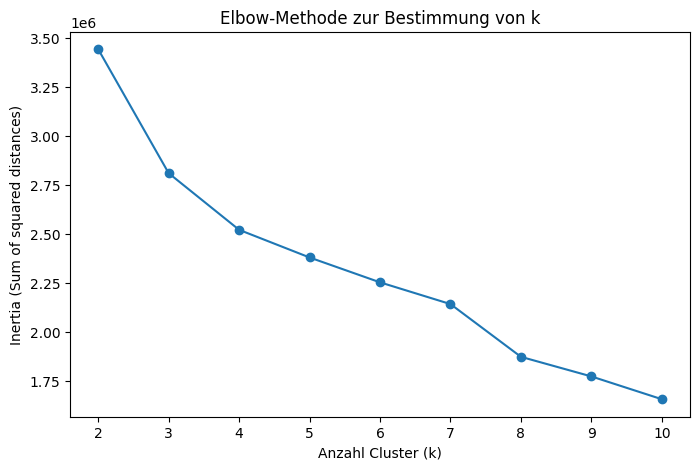

Clustergrößen:
cluster
0    88323
7    84131
8    68981
6    27606
5    21997
3    19170
2    15219
9     6415
1     4300
4       38
Name: count, dtype: int64

Mittelwerte pro Cluster:
         employees_numerical  Bodenrichtwert  business_age       ew2023  \
cluster                                                                   
0                   3.967098     2375.828677      7.225796   132.446237   
1                   0.806163     3049.406233      7.394419  2952.976512   
2                   1.972896     2985.855299      8.740325  1296.251133   
3                   3.444392    12307.303078      8.509338   404.740741   
4                6315.368421     2547.631579     24.684211   171.026316   
5                   2.936582     3040.126935      8.022685  1516.691003   
6                  11.294900     2614.746454     30.385532   268.640114   
7                   1.738022     2279.520155      6.646789   456.780628   
8                   1.862426     2556.090819      8.037054   871.

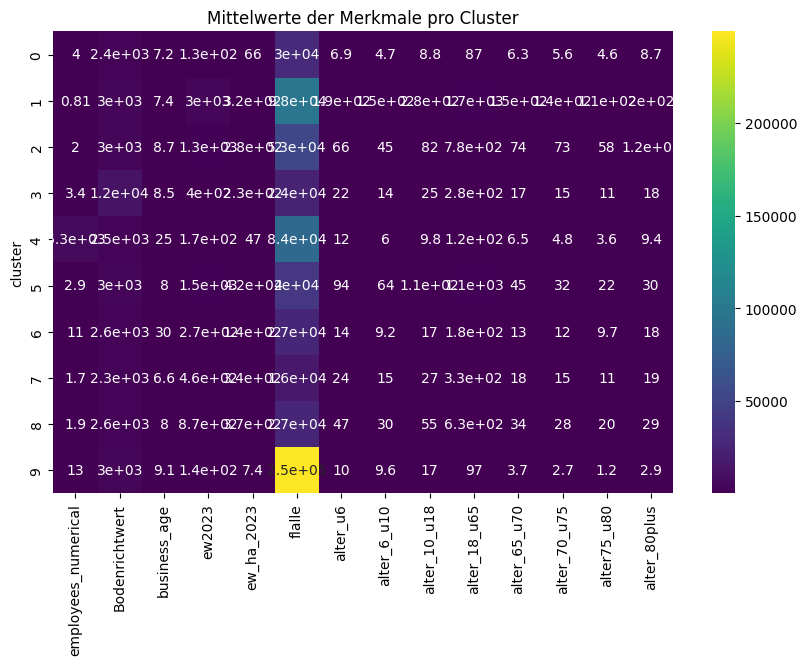

In [6]:
# 1) Spaltenauswahl (nur numerische)
numeric_cols = [
    "employees_numerical", "Bodenrichtwert", "business_age", 
    "ew2023", "ew_ha_2023", "flalle",
    "alter_u6", "alter_6_u10", "alter_10_u18", "alter_18_u65",
    "alter_65_u70", "alter_70_u75", "alter75_u80", "alter_80plus"
]

# Aus deinem DataFrame df die relevanten Spalten herausfiltern
df_cluster = df[numeric_cols].copy()

# 2) NaN-Werte entfernen
df_cluster.dropna(inplace=True)

# 3) Daten skalieren (StandardScaler)
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# 4) Elbow-Methode, um eine geeignete Clusteranzahl abzuschätzen
inertias = []
K_range = range(2, 11)  # Clusteranzahl von 2 bis 10
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'o-')
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.title("Elbow-Methode zur Bestimmung von k")
plt.show()

# 5) KMeans-Cluster mit gewählter k (z.B. k=5)
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Clusterlabels im DataFrame speichern
df_cluster["cluster"] = kmeans.labels_

# Optional: Rückschreiben in df, damit du Clusterinfo dort auch hast
df.loc[df_cluster.index, "cluster"] = df_cluster["cluster"]

# 6) Erste Analyse: Clustergrößen und Mittelwerte
print("Clustergrößen:")
print(df_cluster["cluster"].value_counts())

cluster_means = df_cluster.groupby("cluster").mean()
print("\nMittelwerte pro Cluster:")
print(cluster_means)

# Heatmap zur Visualisierung der Mittelwerte pro Cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="viridis")
plt.title("Mittelwerte der Merkmale pro Cluster")
plt.show()


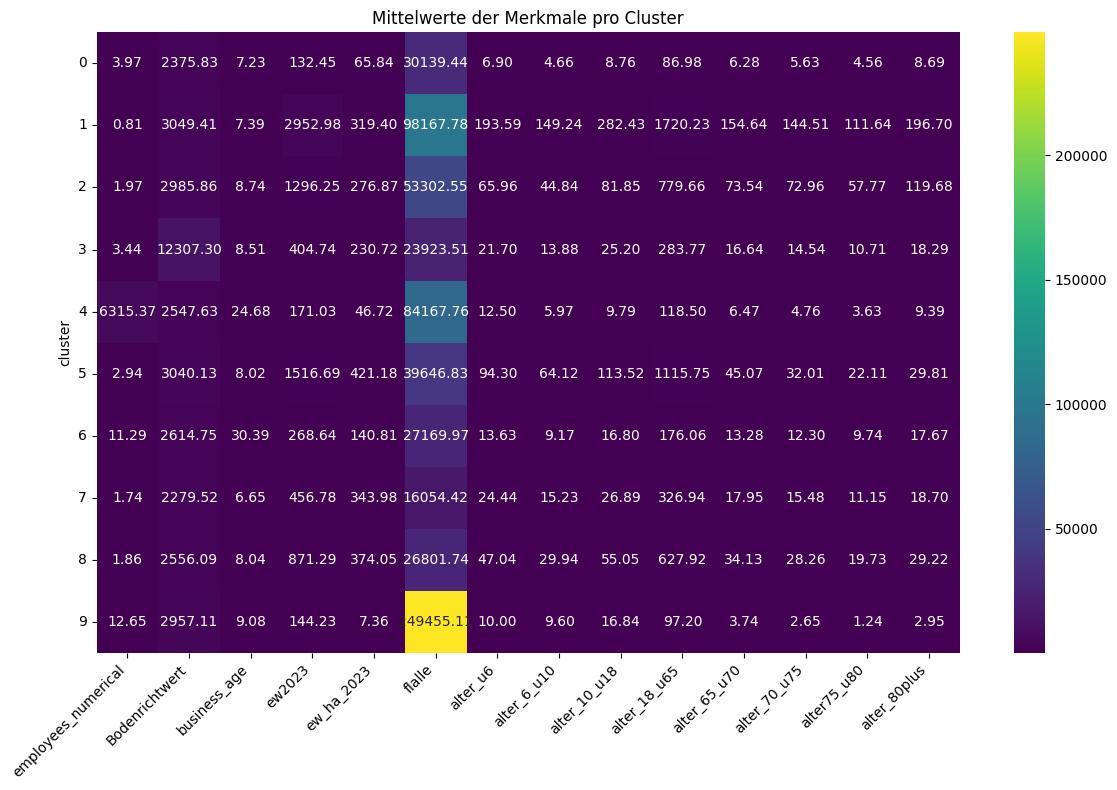

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# fmt=".2f" für zwei Nachkommastellen
sns.heatmap(cluster_means, 
            annot=True, 
            fmt=".2f", 
            cmap="viridis")

plt.title("Mittelwerte der Merkmale pro Cluster")

# X-Achse leicht drehen, damit Spaltennamen nicht überlappen
plt.xticks(rotation=45, ha="right")
# Y-Achse unverändert oder auf 0 drehen
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


# Finale Evaluierung

In [8]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.colors as mcolors
from shapely.geometry import Point
from shapely.ops import unary_union

# 1) Aus deinem DataFrame df ein GeoDataFrame erstellen
#    Angenommen, df hat Spalten: "longitude", "latitude", "cluster"
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["longitude"], df["latitude"]),
    crs="EPSG:4326"
)

# 2) Für jeden Cluster alle Punkte vereinen und die Convex Hull berechnen
cluster_polygons = []
for cluster_label, group in gdf.groupby("cluster"):
    # Alle Punkte des Clusters zu einem Multipoint verschmelzen
    multi_pt = unary_union(group["geometry"].tolist())
    # Convex Hull (äußerste Grenze)
    hull = multi_pt.convex_hull
    
    cluster_polygons.append({
        "cluster": cluster_label,
        "geometry": hull
    })

# 3) Neues GeoDataFrame mit den Hüllpolygons
gdf_hulls = gpd.GeoDataFrame(cluster_polygons, crs="EPSG:4326")

# 4) Farbzuteilung pro Cluster (z. B. mithilfe der Tableau-Palette)
unique_clusters = sorted(gdf_hulls["cluster"].unique())
colors_list = list(mcolors.TABLEAU_COLORS.values())
cluster_to_color = {}
for i, c in enumerate(unique_clusters):
    cluster_to_color[c] = colors_list[i % len(colors_list)]

# 5) Folium-Karte erstellen (Berlin als Beispiel)
m = folium.Map(location=[52.52, 13.405], zoom_start=10)

# 6) Für jedes Hüllpolygon einen Layer auf der Karte anlegen
for idx, row in gdf_hulls.iterrows():
    cluster_label = row["cluster"]
    geom = row["geometry"]
    color = cluster_to_color[cluster_label]
    
    # GeoJson-Objekt erstellen und stylen
    folium.GeoJson(
        data=geom.__geo_interface__,
        style_function=lambda x, col=color: {
            "color": col,        # Umrissfarbe
            "fillColor": col,    # Füllfarbe
            "fillOpacity": 0.3,
            "weight": 2
        },
        name=f"Cluster {cluster_label}"
    ).add_to(m)

# 7) Optional: Cluster-Layer hinzufügen
folium.LayerControl().add_to(m)

# 8) Karte im Jupyter-Notebook anzeigen oder als HTML speichern
m
# m.save("clusters_hulls_map.html")